In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [2]:
spark = SparkSession.builder.getOrCreate()

# Section 1

In [3]:
section1 = spark.read.option("header", "true").option("inferSchema", "true").csv("section_1_data.csv")

In [4]:
section1.limit(10).toPandas()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
5,c9628ea8d9cfd2ca72e14d53783aca90,2019-08-05 03:59:27 +0000,Opening For Adobe Analytics Specialist,"7,00,000 - 17,00,000 PA.",5 - 7 yrs,adobe experience manager| digital| digital ma...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",System Analyst
6,2008eb365fa0ebcb1ccd9a50efc3da49,2019-07-06 09:20:22 +0000,Sales- Fresher-for Leading Property Consultant,"2,00,000 - 3,00,000 PA.",0 - 0 yrs,channel partners| real estate| negotiation| p...,Retail Sales,Bengaluru,"Sales , Retail , Business Development","Real Estate, Property",Sales Executive/Officer
7,9642bed00e26183e41ab73778bf48108,2019-08-04 03:31:17 +0000,Opportunity For Azure Devops Architect For Hy...,Not Disclosed by Recruiter,9 - 14 yrs,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,Programming & Design,Hyderabad,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Architect
8,2633768efe8c6f72d75158f1c173f893,2019-07-06 15:41:47 +0000,BDE- PUNE,Not Disclosed by Recruiter,2 - 7 yrs,Bde,Institutional Sales,Pune,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
9,138a9ab97a766d8048f5b246172f65ed,2019-07-04 12:37:52 +0000,Technical Support/ Product Support,Not Disclosed by Recruiter,1 - 5 yrs,technical support| support services| applicat...,Voice,Bengaluru,"ITES , BPO , KPO , LPO , Customer Service , Op...","IT-Software, Software Services",Associate/Senior Associate -(Technical)


In [5]:
section1.describe().toPandas()

,summary,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,count,30000,30000,29425,29950,29427,28729,27696,29423,29427,29427,29100
1,mean,None,None,None,11250.25,None,None,None,None,None,0.0,None
2,stddev,None,None,None,7499.5,None,None,None,None,None,NaN,None
3,min,0000291c2bf49f4e2b1d3452c89264b2,2019-07-04 01:26:32 +0000,..RPA Mumbai (UI Path/Blue Prism/Automation A...,* Annual Paid Leaves for 30-45 days * Tax Fre...,0 - 1 Years,& centOS| Redhat| server| virtualization| Swi...,A tele-caller job is basic service to attend ...,Ahmedabad,Bengaluru,Hyderabad,Dubai
4,max,ffffdd2630297057e073075cd009856d,2019-08-06 09:24:54 +0000,iOS Developers,hyderabad,"chennai""",wipro|dell|ericson|technical support|tech grad...,llegis Group India is a wholly owned subsidiar...,thane,llegis Group India is a wholly owned subsidiar...,llegis Group India is a wholly owned subsidiar...,llegis Group India is a wholly owned subsidiar...


### Q1: These are the top 10 roles in the data. 

Filtered out irrelevant data like `null, other, Other`

In [6]:
section1.filter(~F.col("Role").isin(["null", "other", "Other"])).groupBy("Role").agg(F.count("Uniq Id").alias("count")).orderBy(F.col("count").desc()).show(10, truncate=False)


+------------------------------------------+-----+
|Role                                      |count|
+------------------------------------------+-----+
|Software Developer                        |6395 |
|Associate/Senior Associate -(NonTechnical)|1727 |
|Sales/Business Development Manager        |1561 |
|Sales Executive/Officer                   |1168 |
|Team Lead/Technical Lead                  |847  |
|Associate/Senior Associate -(Technical)   |513  |
|Accounts Executive/Accountant             |511  |
|Recruitment Executive                     |427  |
|Testing Engineer                          |408  |
|Fresher                                   |380  |
+------------------------------------------+-----+
only showing top 10 rows



In [7]:

@F.udf(returnType=T.ArrayType(T.IntegerType()))
def regexp_extract_all_integer(s, regexp):
     return None if s == None or s == "Not Disclosed by Recruiter" else list(map(lambda a_string: int(a_string), re.findall(regexp, s.replace(",",""))))

query = """aggregate(
    `{col}`,
    CAST(0.0 AS double),
    (acc, x) -> acc + x,
    acc -> acc / size(`{col}`)
) AS  `avg_{col}`""".format(col="all_numbers")

section1 = section1.withColumn(
    "all_numbers",
    regexp_extract_all_integer(F.col("Job Salary"), F.lit(r'(\d+)'))
)

# If you run this multiple times, same name multiple columns will be generated
section1 = section1.selectExpr("*", query).drop("all_numbers")


In [8]:
section1.limit(10).toPandas()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,avg_all_numbers
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,NaN
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,NaN
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,NaN
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,300000.0
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,NaN
5,c9628ea8d9cfd2ca72e14d53783aca90,2019-08-05 03:59:27 +0000,Opening For Adobe Analytics Specialist,"7,00,000 - 17,00,000 PA.",5 - 7 yrs,adobe experience manager| digital| digital ma...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",System Analyst,1200000.0
6,2008eb365fa0ebcb1ccd9a50efc3da49,2019-07-06 09:20:22 +0000,Sales- Fresher-for Leading Property Consultant,"2,00,000 - 3,00,000 PA.",0 - 0 yrs,channel partners| real estate| negotiation| p...,Retail Sales,Bengaluru,"Sales , Retail , Business Development","Real Estate, Property",Sales Executive/Officer,250000.0
7,9642bed00e26183e41ab73778bf48108,2019-08-04 03:31:17 +0000,Opportunity For Azure Devops Architect For Hy...,Not Disclosed by Recruiter,9 - 14 yrs,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,Programming & Design,Hyderabad,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Architect,NaN
8,2633768efe8c6f72d75158f1c173f893,2019-07-06 15:41:47 +0000,BDE- PUNE,Not Disclosed by Recruiter,2 - 7 yrs,Bde,Institutional Sales,Pune,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,NaN
9,138a9ab97a766d8048f5b246172f65ed,2019-07-04 12:37:52 +0000,Technical Support/ Product Support,Not Disclosed by Recruiter,1 - 5 yrs,technical support| support services| applicat...,Voice,Bengaluru,"ITES , BPO , KPO , LPO , Customer Service , Op...","IT-Software, Software Services",Associate/Senior Associate -(Technical),NaN


### Q2: Following is the distribution details and histogram of salaries.. 
(removed unusually small or big numbers keeping the distribution intact)

In [9]:
section1.select("avg_all_numbers").summary().show()


+-------+-------------------+
|summary|    avg_all_numbers|
+-------+-------------------+
|  count|               8709|
|   mean|  668162.0366346526|
| stddev|1.330907491528317E7|
|    min|      -1.41833887E8|
|    25%|           220000.0|
|    50%|           350000.0|
|    75%|           650000.0|
|    max|      1.224587868E9|
+-------+-------------------+



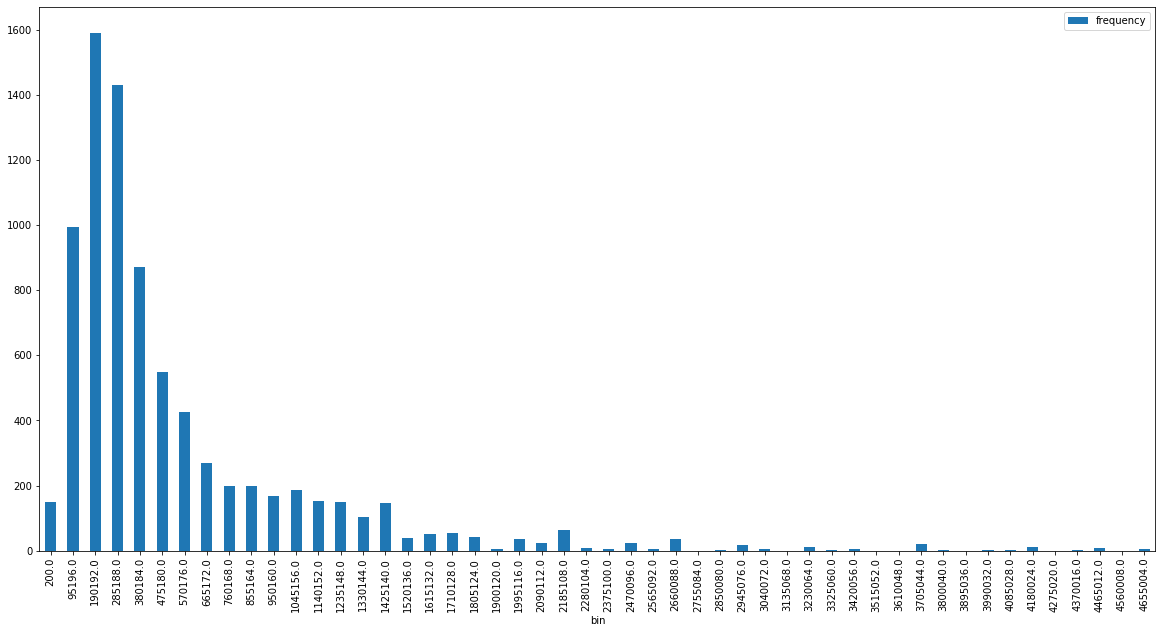

In [10]:
gre_histogram = section1.select('avg_all_numbers').filter((F.col("avg_all_numbers") > 100) & (F.col("avg_all_numbers") < 5000000)
                                                         ).rdd.flatMap(lambda x: x).histogram(50)
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(list(zip(*gre_histogram)), columns=['bin', 'frequency']).set_index('bin').plot(kind='bar', figsize=(20, 10));


### Question 3: Following are the most common skills

There is definitely an overlap between multiple roles

In [11]:
skills = section1.select("Key Skills").rdd.filter(lambda x: x["Key Skills"] != None).flatMap(
    lambda x: x["Key Skills"].upper().split("|")).map(lambda x: x.strip())
# skills.take(50)
skills = skills.map(lambda x: (x, 1)).reduceByKey(lambda x,y : x+y).sortBy(lambda x: -x[1])

In [12]:
skills.take(10)

[('SALES', 3244),
 ('MANAGER', 2889),
 ('DEVELOPER', 2798),
 ('JAVASCRIPT', 2264),
 ('JAVA', 1735),
 ('EXECUTIVE', 1578),
 ('SQL', 1562),
 ('HTML', 1546),
 ('SOFTWARE', 1501),
 ('CUSTOMER SERVICE', 1339)]

### Question 4: Top skills at the highest paid positions are the following.

In [13]:
# Highest paid positions as 75th percentile of data

top_skills = section1.filter(F.col("avg_all_numbers") > 75000).select("Key Skills").rdd.filter(
    lambda x: x["Key Skills"] != None).flatMap(
    lambda x: x["Key Skills"].upper().split("|")).map(lambda x: x.strip())
# skills.take(50)
top_skills = top_skills.map(lambda x: (x, 1)).reduceByKey(lambda x,y : x+y).sortBy(lambda x: -x[1])

top_skills.take(10)

[('SALES', 1636),
 ('MANAGER', 1384),
 ('EXECUTIVE', 1260),
 ('DEVELOPER', 1037),
 ('HR', 739),
 ('SOFTWARE', 558),
 ('FRESHER', 518),
 ('ENGINEER', 503),
 ('BPO', 503),
 ('MARKETING', 492)]

### Question 5: There is definitely correlation between seniority and salary

We would not be able to see it if we did not remove the outliers as shown below. 

In [14]:
section1 = section1.withColumn(
    "all_exp",
    regexp_extract_all_integer(F.col("Job Experience Required"), F.lit(r'(\d+)'))
)

query = """aggregate(
    `{col}`,
    CAST(0.0 AS double),
    (acc, x) -> acc + x,
    acc -> acc / size(`{col}`)
) AS  `avg_{col}`""".format(col="all_exp")


# If you run this multiple times, same name multiple columns will be generated
section1 = section1.selectExpr("*", query).drop("all_exp")

In [15]:
corr_with_outliers = section1.stat.corr("avg_all_exp", "avg_all_numbers")

corr_wo_outliers = section1.filter((F.col("avg_all_numbers") > 100) & (F.col("avg_all_numbers") < 7500000)).stat.corr("avg_all_exp", "avg_all_numbers")

print(corr_with_outliers)
print(corr_wo_outliers)

0.006459525105580585
0.7040802524150297


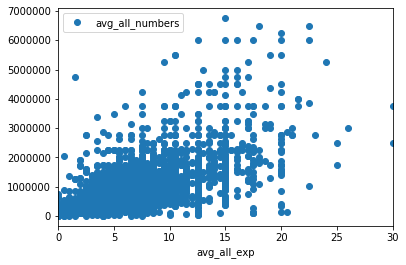

In [16]:
section1.filter((F.col("avg_all_numbers") > 100) & (F.col("avg_all_numbers") < 7500000))\
.select("avg_all_exp", "avg_all_numbers").toPandas().plot(x='avg_all_exp', y='avg_all_numbers', style='o')

plt.show()

### Question 6: 

There is a hiring pattern in the data. All metro cities are hiring for Software Developer but the most is Bangalore, because Bangalore is the IT hub of India. Pune is also becoming an upcoming hub for software developers. 

Including developers, there are tech/non-tech supporting roles and lead roles as well. 


In [17]:
section1.filter(~F.col("Role").isin(["null", "other", "Other"])).groupBy(["Location", "Role"]).agg(F.count("Uniq Id").alias("count")).orderBy(
    F.col("count").desc()).show(20, truncate=False)


+---------+------------------------------------------+-----+
|Location |Role                                      |count|
+---------+------------------------------------------+-----+
|Bengaluru|Software Developer                        |1562 |
|Pune     |Software Developer                        |732  |
|Hyderabad|Software Developer                        |642  |
|Mumbai   |Software Developer                        |516  |
|Kolkata  |Associate/Senior Associate -(NonTechnical)|484  |
|Chennai  |Software Developer                        |395  |
|Gurgaon  |Software Developer                        |343  |
|Noida    |Software Developer                        |283  |
|Ahmedabad|Software Developer                        |258  |
|Bengaluru|Team Lead/Technical Lead                  |248  |
|Bengaluru|Associate/Senior Associate -(NonTechnical)|226  |
|Kolkata  |Associate/Senior Associate -(Technical)   |219  |
|Mumbai   |Sales/Business Development Manager        |210  |
|Delhi    |Software Deve

### Question 7: As mentioned above, we see a huge number for IT-Software industry in all the metro cities. 

We see a lot of openings for Recruitment and Call Centres as support jobs

In [18]:
section1.filter(F.col("Location") != "null").groupBy(["Location", "Industry"]).agg(F.count("Uniq Id").alias("count")).orderBy(
    F.col("count").desc()).show(20, truncate=False)


+---------+------------------------------------+-----+
|Location |Industry                            |count|
+---------+------------------------------------+-----+
|Bengaluru|IT-Software, Software Services      |2177 |
|Hyderabad|IT-Software, Software Services      |963  |
|Pune     |IT-Software, Software Services      |962  |
|Mumbai   |IT-Software, Software Services      |895  |
|Kolkata  |IT-Software, Software Services      |880  |
|Chennai  |IT-Software, Software Services      |570  |
|Bengaluru|Recruitment, Staffing               |493  |
|Gurgaon  |IT-Software, Software Services      |491  |
|Noida    |IT-Software, Software Services      |444  |
|Ahmedabad|IT-Software, Software Services      |324  |
|Mumbai   |Recruitment, Staffing               |318  |
|Mumbai   |Banking, Financial Services, Broking|314  |
|Bengaluru|BPO, Call Centre, ITeS              |265  |
|Ahmedabad|Recruitment, Staffing               |256  |
|Delhi    |IT-Software, Software Services      |252  |
|Bengaluru

In [19]:

top_jobs = section1.select("Job Title").rdd.filter(
    lambda x: x["Job Title"] != None).flatMap(
    lambda x: x["Job Title"].lower().split("/")).flatMap(
    lambda x: x.split("-")).map(lambda x: x.strip())
top_jobs.take(10)

['digital media planner',
 'online bidding executive',
 'trainee research',
 'research executive',
 'hi',
 'tech operations',
 'technical support',
 'software test engineer',
 'hyderabad',
 'opening for adobe analytics specialist']

In [20]:
top_jobs_wc = top_jobs.collect()

### Question 8: Following is the word cloud from the job descriptions

And it looks like a lot of Software Developers, Business Development/Sales Executies are in demand. 

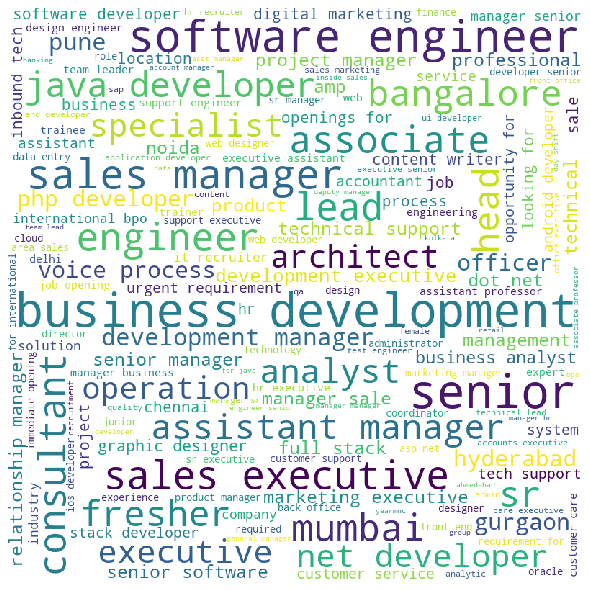

In [21]:
stopwords = set(STOPWORDS).union(set(["hiring", "opening", "urgent", "walk"])) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, min_font_size = 10).generate(" ".join(top_jobs_wc)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Q9: Describe in general how can such information be connected to a system of recommendations for job seekers? What are the significant challenges in this type of system?

Such information can collected from chatbots or web-forms, relayed into a database through Spark Streaming/Spark-Core by clean the data thoroughly and handling edge cases of missing data/incomplete data. We can add business rules for data quality and assurance, for e.g. Salary will not be less than INR 200 (which exists in this data). 

The information that we have extracted about patterns in job roles, skills, seniority and salaries can be used to create a job-to-user match matrix for a recommendation engine and based on a threshold of the matching criteria, we can suggest jobs to a user.

Major challenge is getting the correct and complete information from the user that we would need for the recommendation system. 